In [1]:
import argparse
from enum import Enum
import io
from PIL import Image as PilImage, ImageDraw
import json

# Google APIs
from google.cloud import vision
from google.cloud.vision import types

from IPython.core.display import Image, display

In [2]:
# Some config
#image_file_name = "cajun-potato-salad.jpg"
image_file_name = "cauliflower-soup.jpg"

class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5

client = vision.ImageAnnotatorClient()

In [3]:
def get_document_bounds(document):
    symbol_bounds = []
    word_bounds = []
    para_bounds = []
    block_bounds = []
    page_bounds = []
    
    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        symbol_bounds.append(symbol.bounding_box)
                    word_bounds.append(word.bounding_box)
                para_bounds.append(paragraph.bounding_box)
            block_bounds.append(block.bounding_box)
        page_bounds.append(block.bounding_box)
    # The list `bounds` contains the coordinates of the bounding boxes.
    return symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds

In [4]:
def render_doc_text(filein_name, document):
    image = PilImage.open(filein_name)
    draw = draw_image(image)
    symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds = get_document_bounds(document)
    draw_boxes(draw, page_bounds, 'blue')
    draw_boxes(draw, block_bounds, 'red')
    draw_boxes(draw, para_bounds, 'yellow')
    return image

In [5]:
def get_document_from_image(filein):
    """Sends the image to Google Vision API to get the annotations"""
    image = types.Image(content=content)
    response = client.document_text_detection(image=image)
    document = response.full_text_annotation
    return document

In [6]:
def draw_image(image):
    """Draws the image to be annotated"""
    return ImageDraw.Draw(image)

In [7]:
def draw_boxes(draw, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    
    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return draw

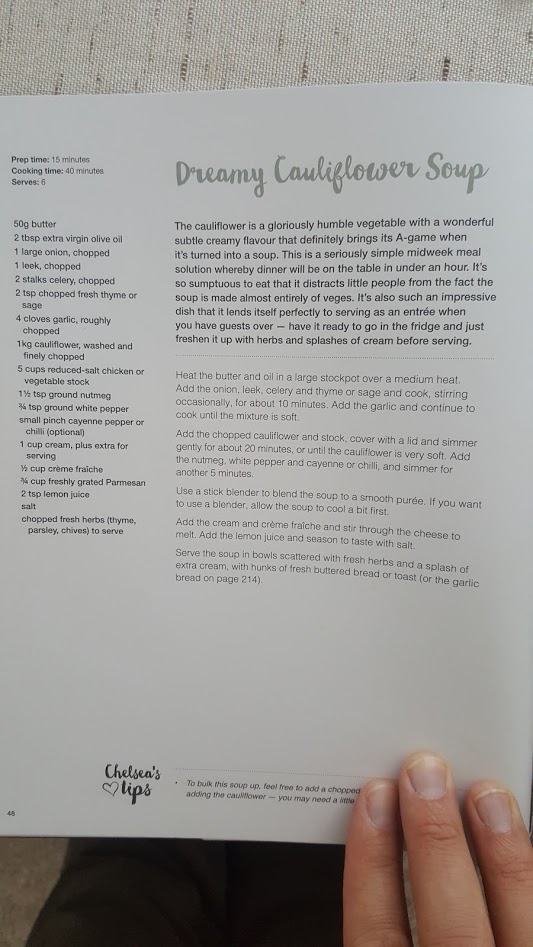

In [8]:
# Read image file
display(Image(image_file_name))
with io.open(image_file_name, 'rb') as image_file:
    content = image_file.read()




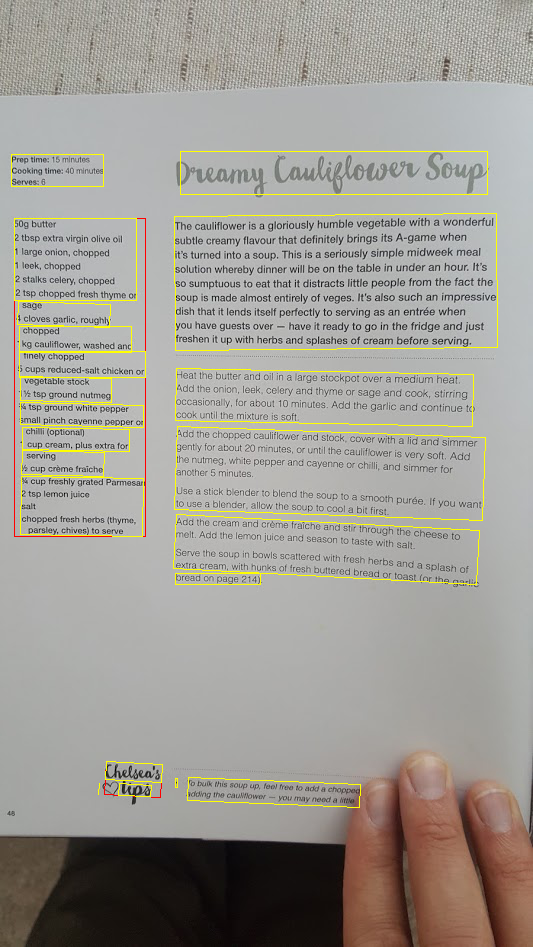

12

443

21

1

In [9]:
document = get_document_from_image(content)
image_with_bounds = render_doc_text(image_file_name, document)
display(image_with_bounds)

symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds = get_document_bounds(document)
display(len(block_bounds))
display(len(word_bounds))
display(len(para_bounds))
display(len(page_bounds))

In [20]:
text = ""

# Process each page
for page in document.pages:
    # Process each block in the page
    for block in page.blocks:
        # Process each paragraph in the block
        for para in block.paragraphs:
            # Process each word in the paragraph
            for word in para.words:
                # Process each symbol in the word
                for symbol in word.symbols:
                    # Process the symbol
                    text += symbol.text
                    
                    # Check for breaks
                    #display(symbol.property.detected_break)
                    if symbol.property.detected_break == SPACE:
                        text += " "

display(text)
#display(document.pages[0].blocks[0].paragraphs[0].words[0].symbols[0].text)
display(document.pages[0].blocks[0].paragraphs[0].words)

NameError: name 'SPACE' is not defined

In [42]:
display(document.text)

"Prep time: 15 minutes\nCooking time: 40 minutes\nServes: 6\nDreamy Cauliflower Soup\nThe cauliflower is a gloriously humble vegetable with a wonderful\nsubtle creamy flavour that definitely brings its A-game when\nIt's turned into a soup. This is a seriously simple midweek meal\nsolution whereby dinner will be on the table in under an hour. It's\nSo sumptuous to eat that it distracts little people from the fact the\nsoup is made almost entirely of veges. It's also such an impressive\ndish that it lends itself perfectly to serving as an entrée when\nyou have guests over have it ready to go in the fridge and just\nfreshen it up with herbs and splashes of cream before serving.\n50g butter\n2 tbsp extra virgin olive oil\n1 large onion, chopped\n1 leek, chopped\n2 stalks celery, chopped\n2 tsp chopped fresh thyme or\nsage\n4 cloves garlic, roughly\nchopped\n1kg cauliflower, washed and\nfinely chopped\n5 cups reduced-salt chicken or\nvegetable stock\n1 tsp ground nutmeg\n4 tsp ground white 

In [43]:
with open("text.txt", "w") as text_file:
    text_file.write(document.text)

In [25]:
display(vision.enums.Detected_Break)

AttributeError: module 'google.cloud.vision_v1.gapic.enums' has no attribute 'Detected_Break'